# 1. Skip Gram
- Skip-Gram là một trong hai mô hình chính của Word2Vec (mô hình còn lại là CBOW). Skip-Gram dự đoán các từ xung quanh dựa trên từ trung tâm.
- Công thức xác suất:
- vwo là vector từ trung tâm, vwi là vector từ dự đoán

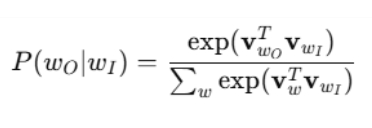





In [1]:
from gensim.models import Word2Vec

# Dữ liệu mẫu
sentences = [
    ["tôi", "thích", "ăn", "cơm"],
    ["tôi", "ăn", "cơm", "với", "bạn"],
    ["bạn", "ăn", "phở", "vào", "buổi", "sáng"],
    ["tôi", "uống", "cà", "phê", "sáng", "nay"]
]

# Huấn luyện Skip-Gram (sg=1)
model = Word2Vec(sentences, vector_size=10, window=2, min_count=1, sg=1)

# Vector của từ "cơm"
print("Vector của từ 'cơm':\n", model.wv["cơm"])

# Từ gần nghĩa với "cơm"
print("Từ gần nghĩa với 'cơm':", model.wv.most_similar("cơm"))


Vector của từ 'cơm':
 [-0.0960355   0.05007293 -0.08759586 -0.04391825 -0.000351   -0.00296181
 -0.0766124   0.09614743  0.04982058  0.09233143]
Từ gần nghĩa với 'cơm': [('phê', 0.613976240158081), ('nay', 0.2495344579219818), ('với', 0.14170897006988525), ('thích', 0.1116870790719986), ('buổi', 0.04264766350388527), ('vào', 0.02682802826166153), ('phở', -0.06571343541145325), ('ăn', -0.22418658435344696), ('cà', -0.2879446744918823), ('uống', -0.3018490970134735)]


# 2. Glove
- sử dụng thống kê toàn cục của từ trong tập dữ liệu.
- Ý tưởng: Xác định ma trận xuất hiện Xij của 2 từ thứ i j trong văn bản. Ánh xạ log(Xij) sang tích của 2 ma trận wi và wj.

In [14]:
pip install --upgrade pip setuptools wheel


In [ ]:
pip install glove


In [ ]:
from glove import Corpus, Glove

# Dữ liệu huấn luyện
sentences = [
    ["tôi", "thích", "ăn", "cơm"],
    ["tôi", "ăn", "cơm", "với", "bạn"],
    ["bạn", "ăn", "phở", "vào", "buổi", "sáng"],
    ["tôi", "uống", "cà", "phê", "sáng", "nay"]
]

# Xây dựng từ điển và ma trận đồng xuất hiện
corpus = Corpus()
corpus.fit(sentences, window=2)

# Huấn luyện mô hình GloVe
glove = Glove(no_components=10, learning_rate=0.05)
glove.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)

# Từ gần nghĩa với "cơm"
print("Từ gần nghĩa với 'cơm':", glove.most_similar("cơm"))


# 3. Thư viện FastText
- Mở rộng của Word2Vec, sử dụng subword embeddings, giúp tính các vecto của từ chưa xuất hiện trong dữ liệu huấn luyện ( khác W2V )

In [20]:
from gensim.models import FastText

# Dữ liệu mẫu
sentences = [
    ["tôi", "thích", "ăn", "cơm"],
    ["tôi", "ăn", "cơm", "với", "bạn"],
    ["bạn", "ăn", "phở", "vào", "buổi", "sáng"],
    ["tôi", "uống", "cà", "phê", "sáng", "nay"]
]

# Huấn luyện FastText
model = FastText(sentences, vector_size=10, window=2, min_count=1, sg=1)

# Kiểm tra từ không có trong tập dữ liệu
print("Vector của từ 'bánh':\n", model.wv["bánh"])


Vector của từ 'bánh':
 [-0.0107413   0.00669303  0.00703728 -0.00647398 -0.00214747  0.03190001
 -0.02275628  0.02040248  0.00093849 -0.02072546]


# 4. Hierarchical Softmax

